In [ ]:
import librosa as lb
from matplotlib import pyplot as plt
import librosa.display
import numpy as np
from IPython.display import Audio 
from IPython.core.display import display
import sounddevice

In [ ]:
def plot_spectrogram(audioIn,fs,name):
    sr, audio= fs, audioIn
    #- Calculate the spectrogram of it.
    spectrogram=lb.core.stft(audio)
    #- Calculate the constant-Q spectrogram of it.
    constantQ_spectrogram=lb.core.cqt(audio, sr = sr)
    #- Calculate the chromagram of it.
    chromagram=lb.feature.chroma_stft(audio, sr)
    
    #- Plot and observe and report differences between the spectrogram,
    # constant-Q spectrogram and chromagram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max),y_axis='log', x_axis='time')
    plt.title('Power spectrogram '+str(name))
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.amplitude_to_db(constantQ_spectrogram, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Constant-Q power spectrum '+str(name))
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title('Chromagram of '+str(name))
    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


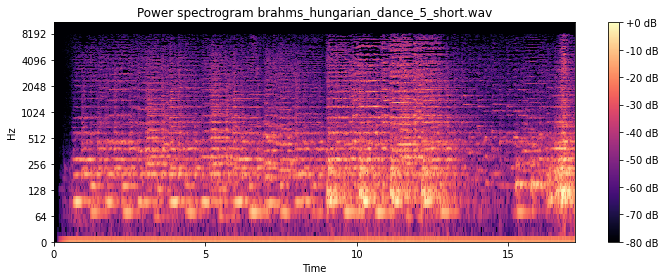

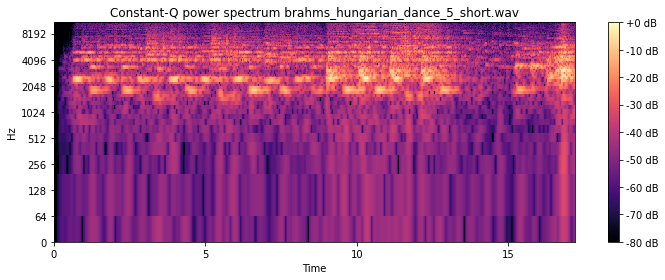

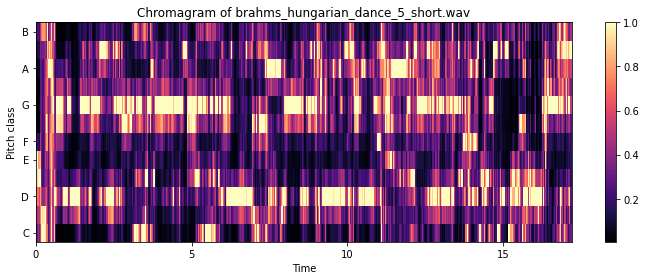

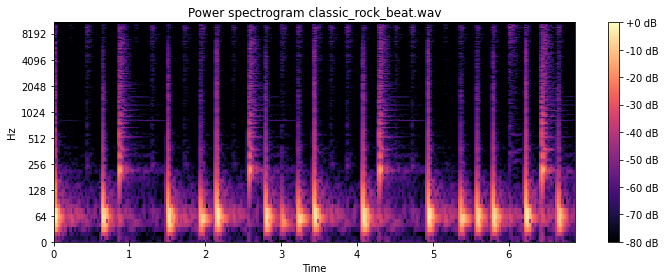

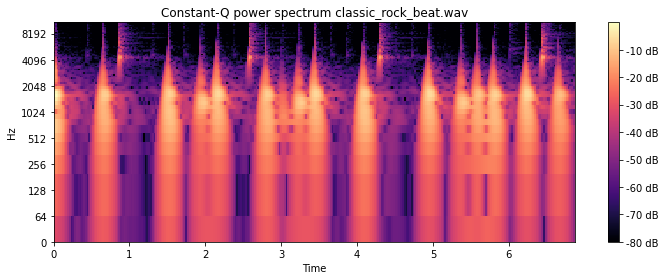

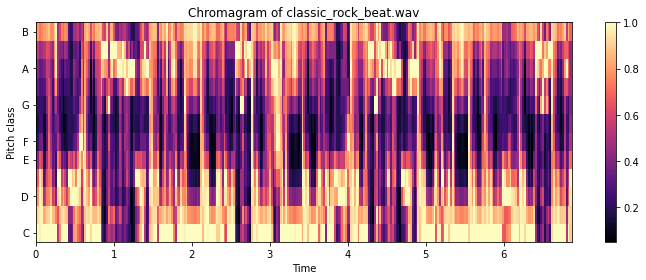

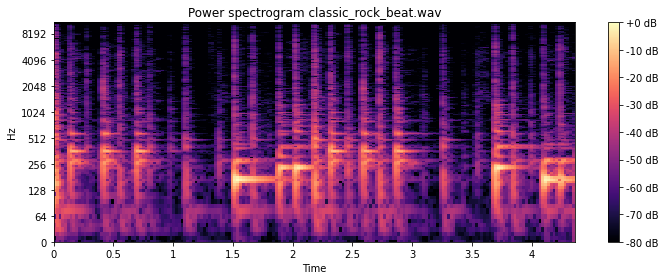

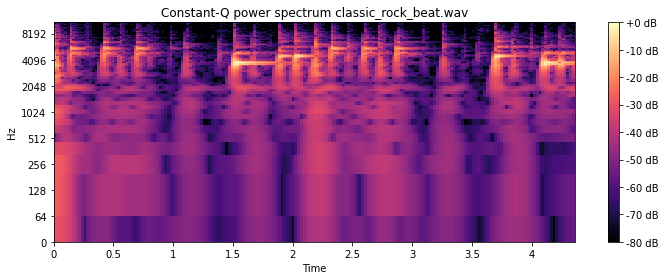

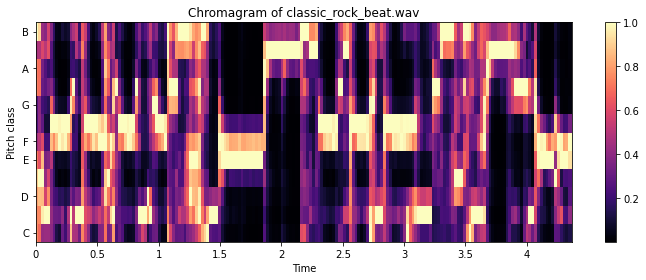

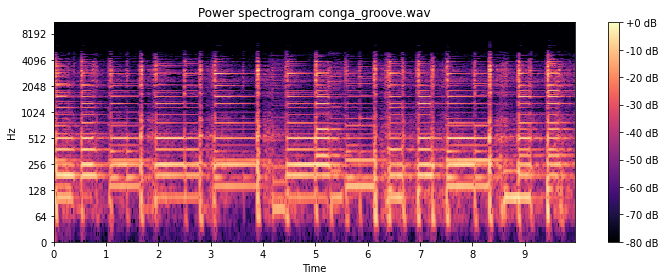

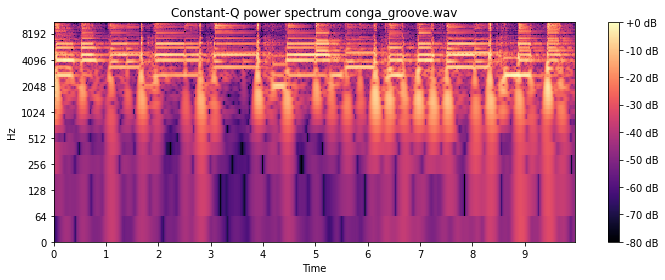

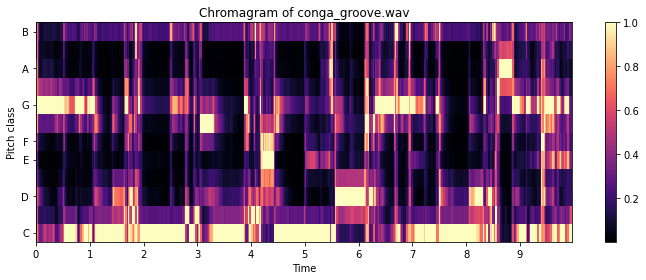

In [ ]:
audioIn, fs=lb.load('/content/brahms_hungarian_dance_5_short.wav', sr=None)
name='brahms_hungarian_dance_5_short.wav'
plot_spectrogram(audioIn,fs,name)
display(Audio(audioIn, rate=fs))

audioIn, fs=lb.load('/content/classic_rock_beat.wav', sr=None)
name='classic_rock_beat.wav'
plot_spectrogram(audioIn,fs,name)
display(Audio(audioIn, rate=fs))

audioIn, fs=lb.load('/content/conga_groove.wav', sr=None)
plot_spectrogram(audioIn,fs,name)
name='conga_groove.wav'
display(Audio(audioIn, rate=fs))

audioIn, fs=lb.load('/content/latin_groove_short.wav', sr=None)
plot_spectrogram(audioIn,fs,name)
name='latin_groove_short.wav'
display(Audio(audioIn, rate=fs))

In STFT, transient-like sounds (a high amplitude, short-duration sound) are difficult to represent in the frequency domain which results in time blurring
Unlike the STFT, the CQT provides a varying time-frequency resolution. This results in a high spectral resolution at low frequencies and high temporal resolution at high frequencies. This can be seen in above spectrograms and cqt of different musical signals.
Chromagram representation gives a description of the different notes
present in the audio. It's representation is quite different from both STFT and CQT.

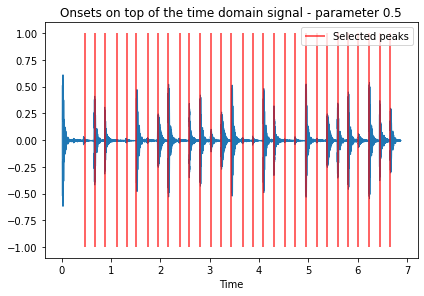

<Figure size 432x288 with 0 Axes>

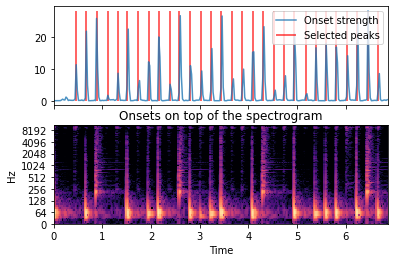

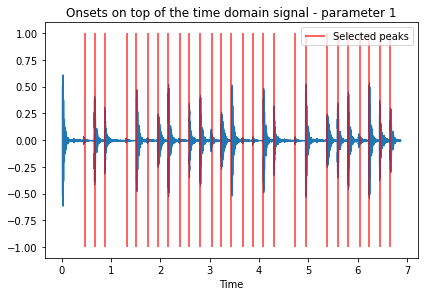

In [ ]:
# 1. Load the audio file.
audioIn, fs=lb.load('/content/classic_rock_beat.wav', sr=None)

# 2. Compute spectral novelty function using librosa library.
onset_env = librosa.onset.onset_strength(y=audioIn, sr=fs)
D = np.abs(librosa.stft(y=audioIn))
times = librosa.times_like(D)

# 3. Pick peaks to detect the frame indexes of the onsets.
peaks_onsetFrames = librosa.util.peak_pick(onset_env, 1, 1, 1, 1, 0.5, 1)

# 4. Convert the frame indexes into time indexes in unit of seconds. 
beat_times = librosa.frames_to_time(peaks_onsetFrames, sr=fs)

# 5. Plot the onsets on top of the time domain signal and report your observations.
plt.figure()
librosa.display.waveplot(audioIn, x_axis='time')
plt.vlines(beat_times, -1,1, color='r', alpha=0.8,
           label='Selected peaks')
plt.legend(frameon=True, framealpha=0.8)
plt.axis('tight')
plt.tight_layout()
plt.title('Onsets on top of the time domain signal - parameter 0.5')
plt.show()

# 6. Plot the onsets on top of the spectrogram and report your observations.
plt.figure()
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[0].plot(times, onset_env, alpha=0.8, label='Onset strength')
ax[0].vlines(beat_times, 0,
             onset_env.max(), color='r', alpha=0.8,
             label='Selected peaks')
ax[0].legend(frameon=True, framealpha=0.8)
ax[0].label_outer()
plt.title("Onsets on top of the spectrogram")
plt.show()

# 7. Adjust the ​librosa.util.peak_pick​ parameters and observe how they affect the detected onsets​.
peaks_ADJUSTED = librosa.util.peak_pick(onset_env, 1, 1, 1, 1, 1, 1)

beat_times = librosa.frames_to_time(peaks_ADJUSTED, sr=fs)
plt.figure()
librosa.display.waveplot(audioIn, x_axis='time')
plt.vlines(beat_times, -1,1, color='r', alpha=0.8,
           label='Selected peaks')
plt.legend(frameon=True, framealpha=0.8)
plt.axis('tight')
plt.tight_layout()
plt.title('Onsets on top of the time domain signal - parameter 1')
plt.show()

# At this point you have detected the onsets.
# Now let us add clicks at the detected onset frames.

# 1. Create a signal with the same length as the analyzed music example
clicks=librosa.clicks(frames=peaks_ADJUSTED, sr=fs, length=len(audioIn))
# Add the two signals together sample-wise
added_1=audioIn+clicks
sounddevice.play(added_1,fs)
# stack two signals to create stereo signal
added_2=np.vstack([audioIn, clicks]).T
sounddevice.play(added_2,fs)

By keeping all the parameters i.e, pre_max, post_max, pre_avg, post_avg and wait for peak_pick function to 1 and only changing the delta (threshold offset), I have come to this conclusion that by increasing delta value we get farther less peaks. and 0.5 is found to be optimum value for delta parameter for rock music.